In [1]:
# Importing the necessary classes
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

** DATA INGESTION **

In [2]:
# Loading the data from csv file to a Pandas DataFrame
data = pd.read_csv("mcdonalds.csv")
data

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


** DATA EXPLORATION **

In [3]:
# Printing the first 20 rows of the dataframe
data.head(10)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
5,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,+2,55,Every three months,Male
6,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,+2,56,Every three months,Female
7,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,I love it!+5,23,Once a week,Female
8,No,No,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,58,Once a year,Male
9,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,No,+1,32,Every three months,Female


In [4]:
# Number of rows and columns in the dataframe
data.shape

(1453, 15)

In [5]:
# Name of all columns in the dataframe
data.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [6]:
# Getting more information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [7]:
# Getting some statistical measures about the column AGE which only has numerical values.
data.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [8]:
# checking for missing values in each column
data.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [9]:
col=data.columns
col=col[:11]
bf=data
for i in col:
  bf[i]=bf[i].map({'Yes':1,'No':0})
bf

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,I hate it!-5,47,Once a year,Male
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,Once a week,Female
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,Once a month,Female
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,Every three months,Male


In [10]:
# distribution of target Variable
data['yummy'].value_counts()

1    803
0    650
Name: yummy, dtype: int64

In [11]:
data['convenient'].value_counts()

1    1319
0     134
Name: convenient, dtype: int64

In [12]:
data['spicy'].value_counts()

0    1317
1     136
Name: spicy, dtype: int64

In [13]:
data['greasy'].value_counts()

1    765
0    688
Name: greasy, dtype: int64

In [14]:
data['fast'].value_counts()

1    1308
0     145
Name: fast, dtype: int64

In [15]:
data['expensive'].value_counts()

0    933
1    520
Name: expensive, dtype: int64

In [16]:
data['healthy'].value_counts()

0    1164
1     289
Name: healthy, dtype: int64

** Label Encoding the original data set**

In [17]:
#Label encoding for categorical - Converting 11 cols with yes/no

from sklearn.preprocessing import LabelEncoder
def labelling(x):
    data[x] = LabelEncoder().fit_transform(data[x])
    return data

col1 = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']

for i in col1:
    labelling(i)
data

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,I hate it!-5,47,Once a year,Male
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,Once a week,Female
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,Once a month,Female
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,Every three months,Male


In [18]:
bf = data
bf= bf.iloc[:,:11]
bf

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [19]:
bf.describe()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
count,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000
mean,0.552650,0.907777,0.093599,0.867171,0.526497,0.900206,0.598761,0.644184,0.357880,0.198899,0.242946
std,0.497391,0.289440,0.291371,0.339506,0.499469,0.299828,0.490318,0.478925,0.479542,0.399309,0.429010
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
bf.corr

<bound method DataFrame.corr of       yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  \
0         0           1      0          1       0     1      1      0   
1         1           1      0          1       1     1      1      1   
2         0           1      1          1       1     1      0      1   
3         1           1      0          1       1     1      1      1   
4         0           1      0          1       1     1      1      0   
...     ...         ...    ...        ...     ...   ...    ...    ...   
1448      0           1      0          1       1     0      0      0   
1449      1           1      0          1       0     0      1      1   
1450      1           1      0          1       0     1      0      1   
1451      1           1      0          0       0     1      1      1   
1452      0           1      0          1       1     0      0      0   

      expensive  healthy  disgusting  
0             1        0           0  
1            

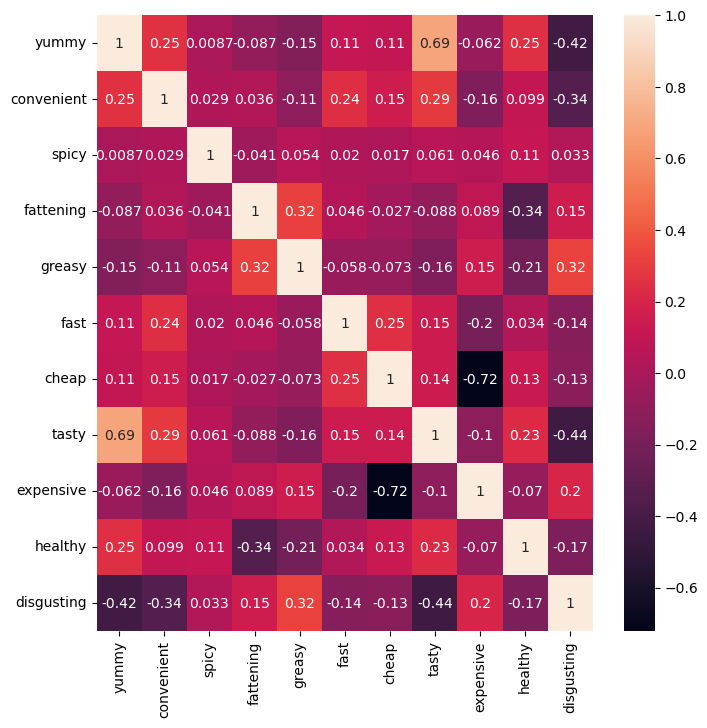

In [22]:
plt.figure(figsize=(8,8))
sns.heatmap(bf.corr(), annot=True)
plt.show()

In [23]:
data.query('Gender == "Male"').Gender.count()

665

In [24]:
data.query('Gender == "Female"').Gender.count()

788

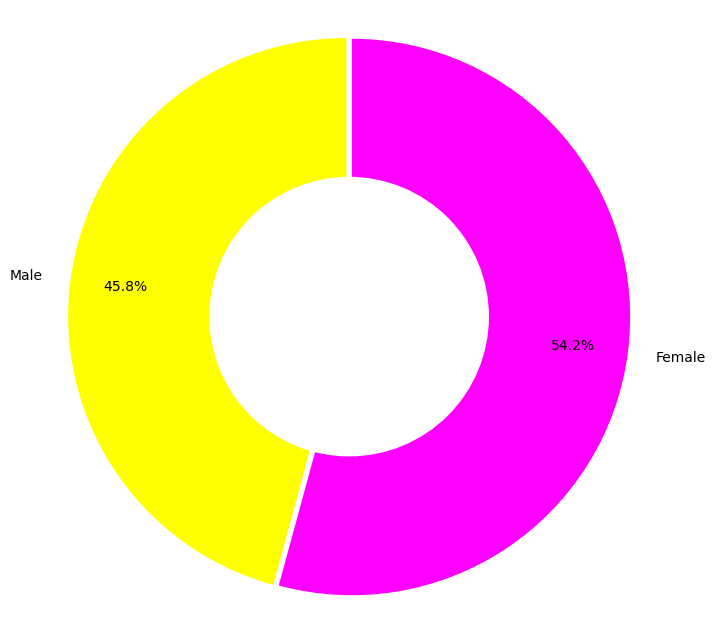

In [25]:
labels = ['Male','Female']
sizes = [data.query('Gender == "Male"').Gender.count(),data.query('Gender == "Female"').Gender.count()]
#colors
colors = ['#FFFF00','#FF00FF']
# Specifies how much each slice should be separated from the center of the pie
explode = (0.01,0.01)
plt.figure(figsize=(8,8))
# This circle will be placed at the center of the pie chart to create a donut-like appearance.
my_circle=plt.Circle( (0,0), 0.5, color='white')
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.80,explode=explode)
p=plt.gcf()
# Ensures that the pie chart is displayed as a circle (equal aspect ratio) rather than an ellipse.
plt.axis('equal')
# Add the white circle (my_circle) to the plot as an artist.
p.gca().add_artist(my_circle)
plt.show()


In [26]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [27]:
X=bf
mapping1 = {}
K = range(1, 10)
# This list will store the sum of the minimum distances of each data point to the cluster centers
tik=[]

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    # cdist() function computes the pairwise distances between points in X and the cluster centers
    tik.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,'euclidean'), axis=1)))
    # Calculates the average of the minimum Euclidean distances for each data point to the cluster centers
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / X.shape[0]

C:\Users\sapta\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\sapta\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


** Getting all results using  values of k ranging from 1 to 9 **

In [28]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 1.3566210503435796
2 : 1.1815545534885894
3 : 1.0710442189448364
4 : 1.0006451603438113
5 : 0.941623842319364
6 : 0.8918156910611919
7 : 0.8467846353120506
8 : 0.8124369935539014
9 : 0.7788023577008172


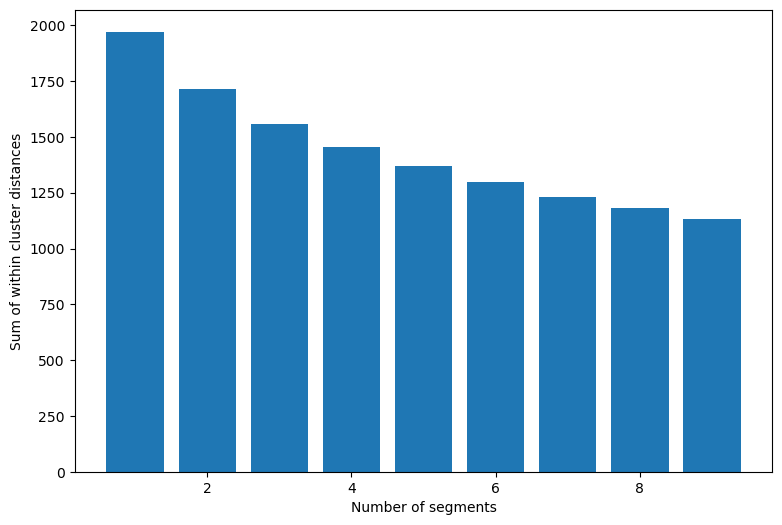

In [29]:
fig = plt.figure(figsize =(9,6 ))
plt.xlabel("Number of segments")
plt.ylabel("Sum of within cluster distances")
# Horizontal Bar Plot
# K represents the x-values corresponding to the number of clusters and tik represents sum of within-cluster distances
# for each value of k
plt.bar(K, tik)
# Show Plot
plt.show()

** Reducing the dimension using PCA so that we can easily visualize it **

In [30]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(bf)
# Contains an array of explained variance ratios for each principal component.
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
print('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(pca.explained_variance_ratio_)))

Explained variation per principal component: [0.29944723 0.19279721]
Cumulative variance explained by 2 principal components: 49.22%


In [31]:
print(len(pca_result))

1453


** Using K means extracting the segments **

** Perform K means clustering and visualizing it over PCA results *

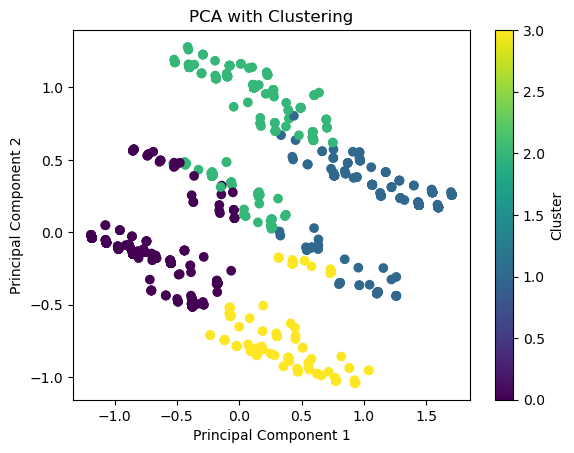

PCA Projection Axes:
[[-0.47693349 -0.15533159 -0.00635636  0.11623168  0.3044427  -0.10849325
  -0.33718593 -0.47151394  0.32904173 -0.21371062  0.37475293]
 [ 0.36378978  0.016414    0.01880869 -0.03409395 -0.06383884 -0.0869722
  -0.61063276  0.3073178   0.60128596  0.07659344 -0.13965633]]


In [32]:
# Perform clustering (for example, using KMeans with 3 clusters)
kmeans = KMeans(n_clusters=4, random_state=42)
# n_clusters specifies the number of clusters to create, and random_state is used to ensure reproducibility of the results.
clusters = kmeans.fit_predict(bf)

# Plot the PCA results with different colors for each cluster
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis')
# c=clusters argument assigns a different color to each cluster in the plot, using the 'viridis' colormap.
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA with Clustering')
plt.colorbar(label='Cluster')
plt.show()

# Display projection axes (principal components)
print("PCA Projection Axes:")
# An attribute of the PCA instance that holds the principal components as row vectors
print(pca.components_)


In [33]:
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

** Performing Hierarchical Clustering **

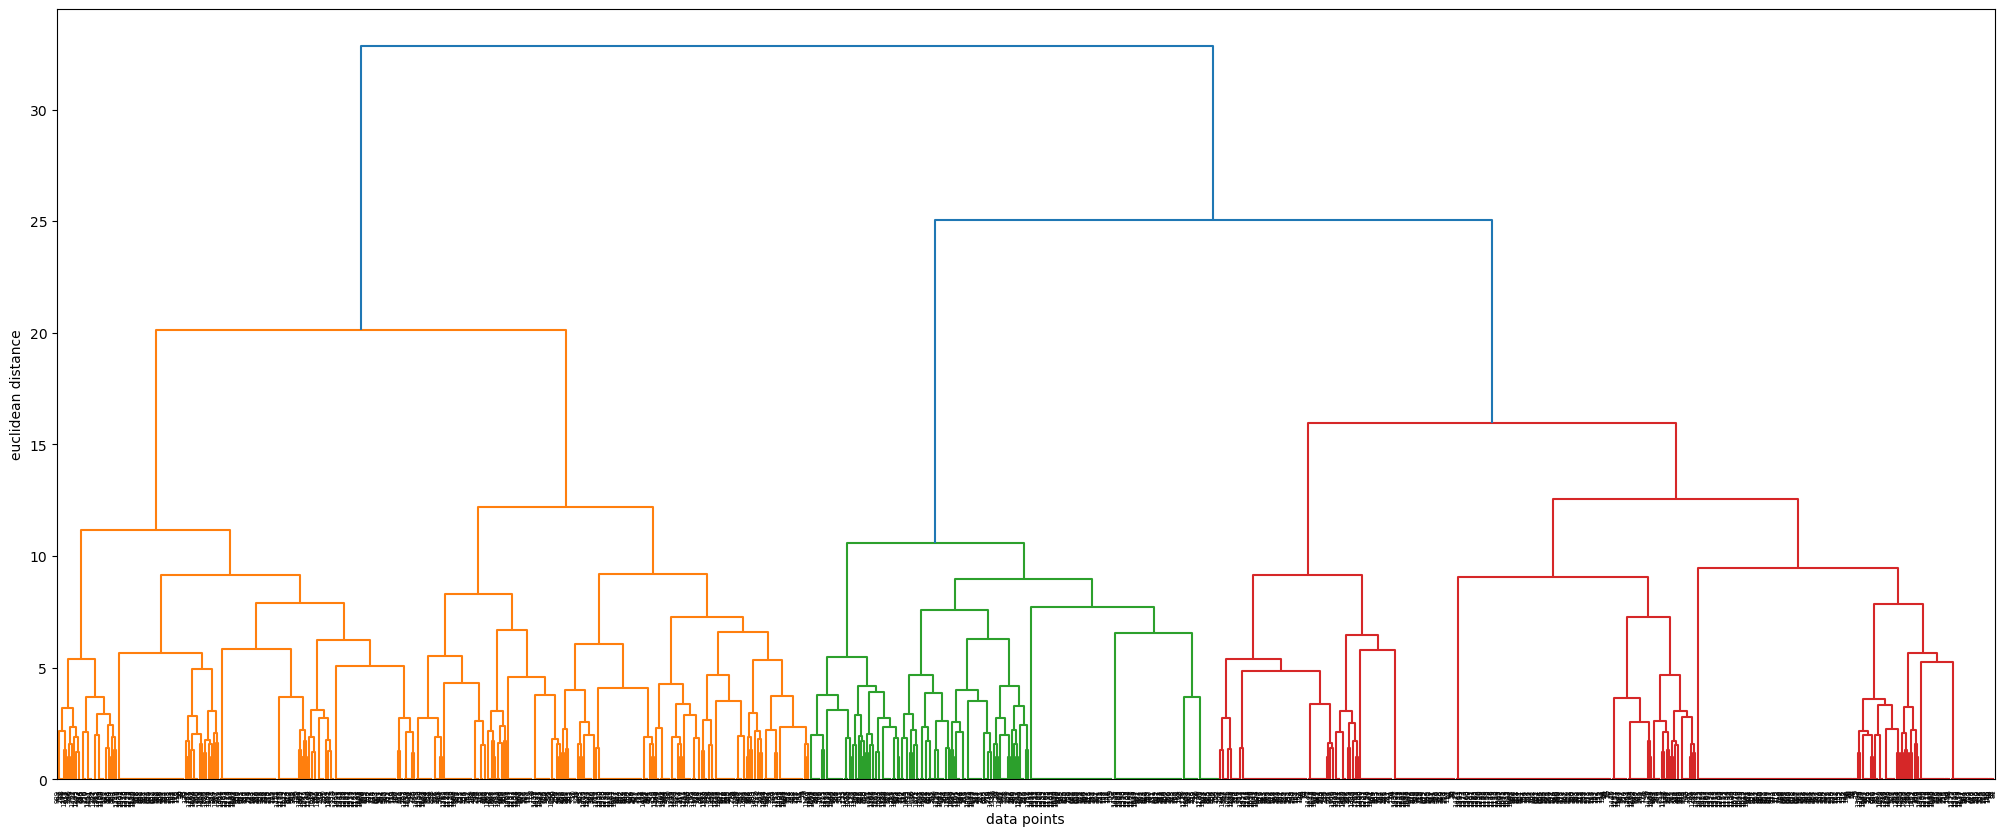

In [34]:
# Computes hierarchical clustering using the linkage function
merg = linkage(bf,method="ward")
plt.figure(figsize=(25,10))
dendrogram(merg,leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()


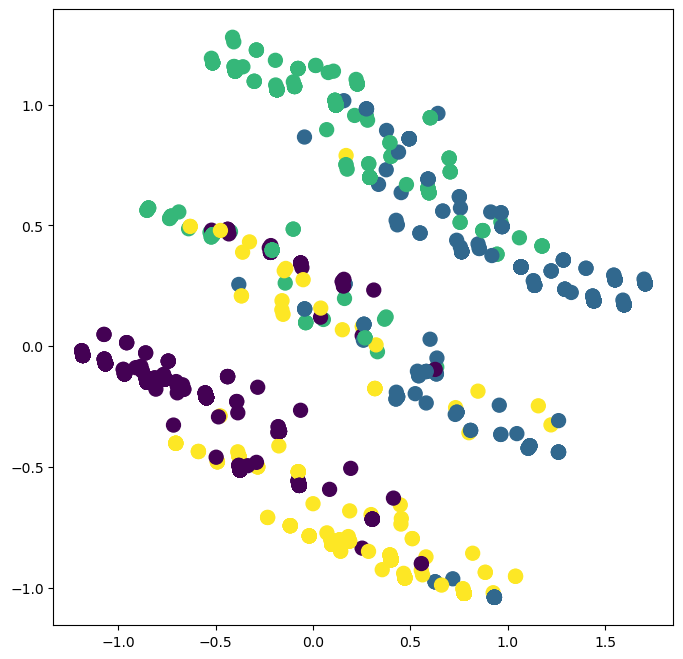

In [35]:
#create model
hiyerartical_cluster = AgglomerativeClustering(n_clusters = 4,affinity= "euclidean",linkage = "ward")
data_predict = hiyerartical_cluster.fit_predict(bf)
plt.figure(figsize=(8,8))
# c=data_predict assigns colors to the data points based on their cluster assignments
# Sets the size of the plotted points
plt.scatter( pca_result[:, 0], pca_result[:, 1] , c = data_predict , s = 100 )
plt.show()

** Now working over the other columns Like and Visit_Frequency **

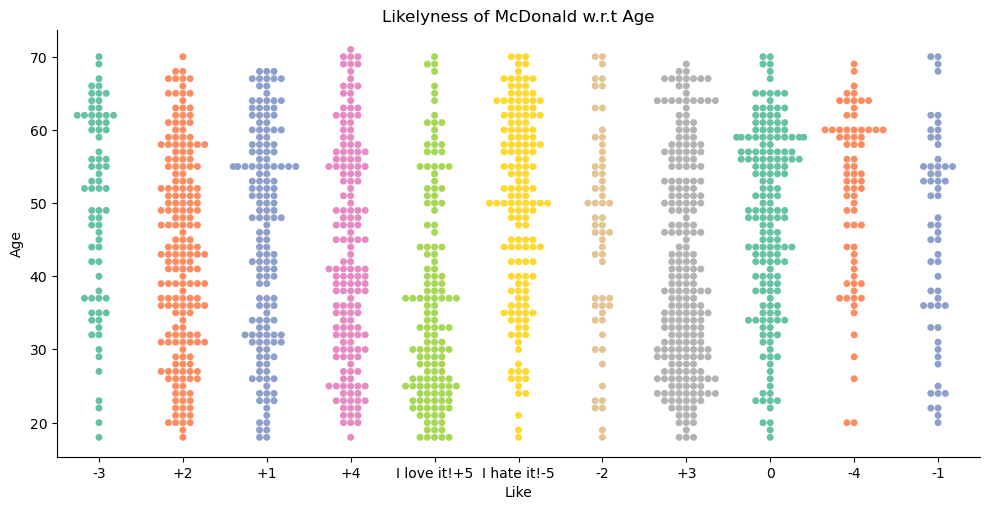

In [36]:
#Customer segmentation - based on pyschographic segmentation

#For convinence renaming the category
bf['Like']= data['Like'].replace({'I hate it!-5': '-5','I love it!+5':'+5'})
# orient="v" sets the orientation of the plot to vertical.
sns.catplot(x="Like", y="Age",data=data,
            orient="v", height=5, aspect=2, palette="Set2",kind="swarm")
plt.title('Likelyness of McDonald w.r.t Age')
plt.show()

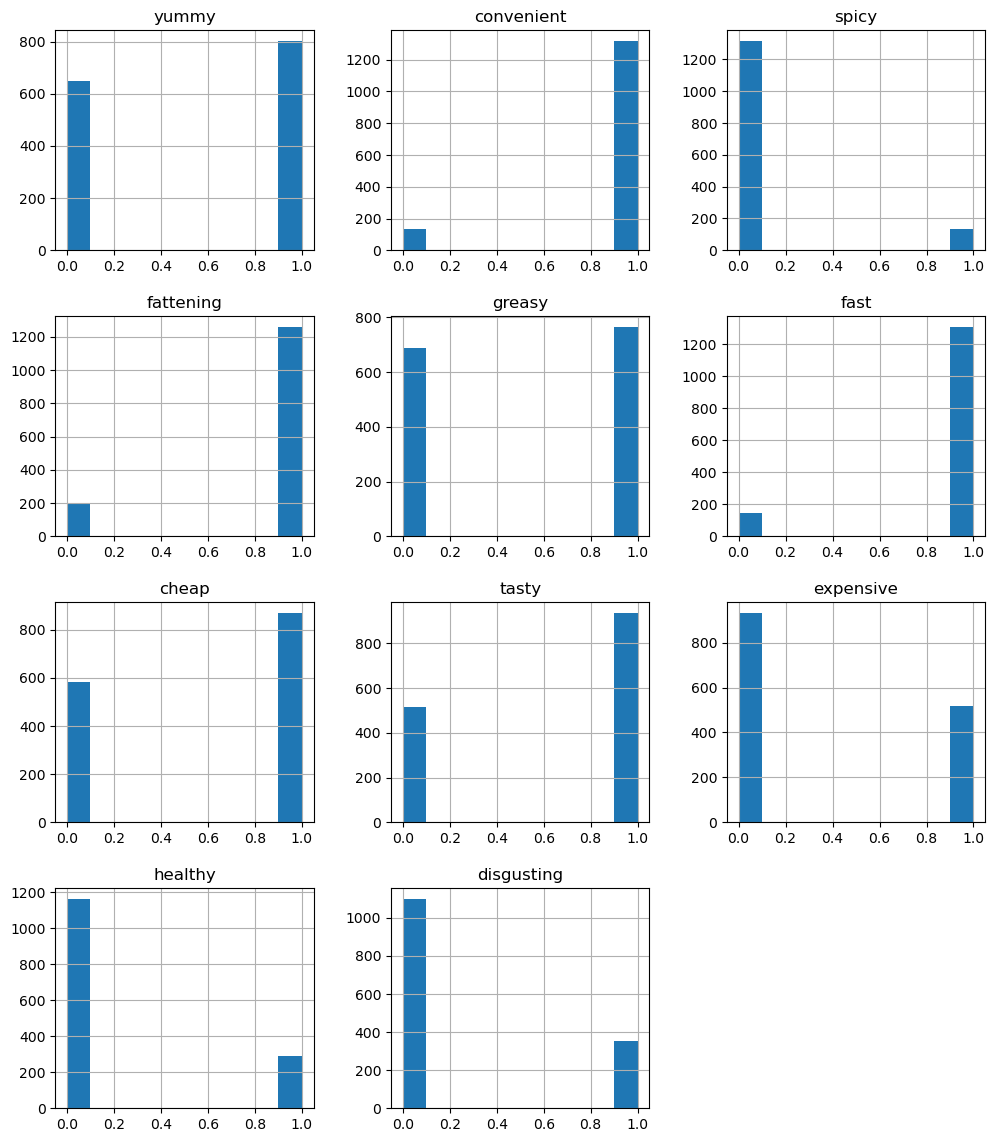

In [37]:
#Histogram of the each attributes
plt.rcParams['figure.figsize'] = (12,14)
bf.hist()
plt.show()


In [38]:
!pip install bioinfokit

In [39]:
from bioinfokit.visuz import cluster

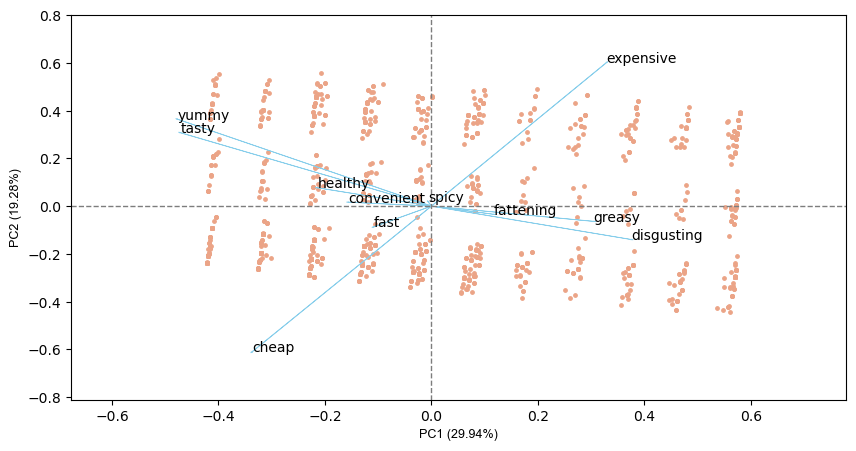

In [40]:
# get PC scores
pca_scores = PCA().fit_transform(bf)

# get 2D biplot which combines both a scatter plot of the PCA scores and arrows representing 
# the loadings of the original features on the principal components.
cluster.biplot(cscore=pca_scores, loadings=pca.components_, labels=bf.columns.values, var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2),show=True,dim=(10,5))
# loadings=pca.components_ provides the principal component loadings (directions) to be displayed as arrows in the biplot.

In [41]:
#adding to df
bf['cluster_num'] = kmeans.labels_

In [42]:
#DESCRIBING SEGMENTS

from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

crosstab =pd.crosstab(bf['cluster_num'],bf['Like'])
#Reordering cols
crosstab = crosstab[['-5','-4','-3','-2','-1','0','+1','+2','+3','+4','+5']]
crosstab

Like,-5,-4,-3,-2,-1,0,+1,+2,+3,+4,+5
cluster_num,,,,,,,,,,,
0,4,4,2,6,13,43,65,90,143,111,99
1,89,28,30,19,13,39,14,6,8,0,0
2,5,3,7,6,7,36,42,60,66,47,44
3,54,36,34,28,25,51,31,31,12,2,0


** Like column representation on the basis of various clusters **

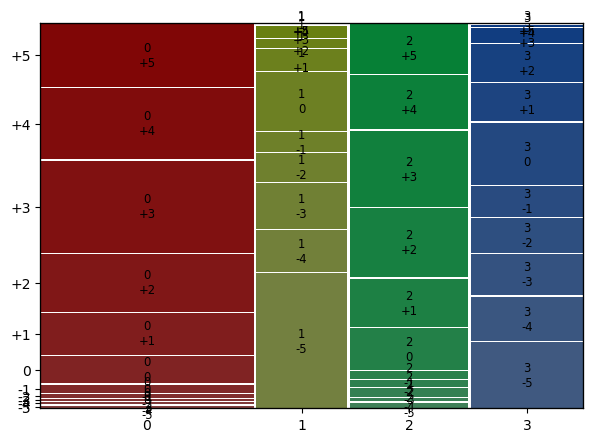

In [43]:
#MOSAIC PLOT
plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab.stack())
plt.show()

In [44]:
#Mosaic plot gender vs segment
crosstab_gender =pd.crosstab(bf['cluster_num'],data['Gender'])
crosstab_gender

Gender,Female,Male
cluster_num,,
0,349,231
1,106,140
2,154,169
3,179,125


** Represents ratio of Male and Female in every cluster **

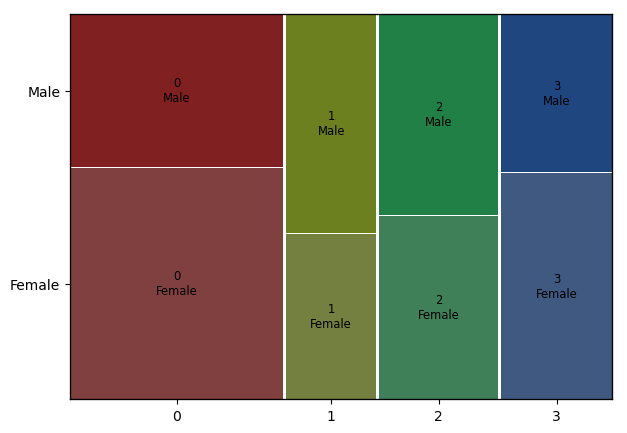

In [45]:
plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab_gender.stack())
plt.show()


In [46]:
# Selecting target segment

#Calculating the mean
#Visit frequency
bf['VisitFrequency'] = LabelEncoder().fit_transform(data['VisitFrequency'])
visit = bf.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,2.584483
1,1,2.654472
2,2,2.547988
3,3,2.822368


In [47]:
#Like
bf['Like'] = LabelEncoder().fit_transform(data['Like'])
Like = bf.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_num,Like
0,0,3.794828
1,1,6.739837
2,2,3.798762
3,3,5.430921


In [48]:
#Gender
bf['Gender'] = LabelEncoder().fit_transform(data['Gender'])
Gender = bf.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_num,Gender
0,0,0.398276
1,1,0.569106
2,2,0.523220
3,3,0.411184


In [49]:
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
segment

,cluster_num,Gender,Like,VisitFrequency
0,0,0.398276,3.794828,2.584483
1,1,0.569106,6.739837,2.654472
2,2,0.523220,3.798762,2.547988
3,3,0.411184,5.430921,2.822368


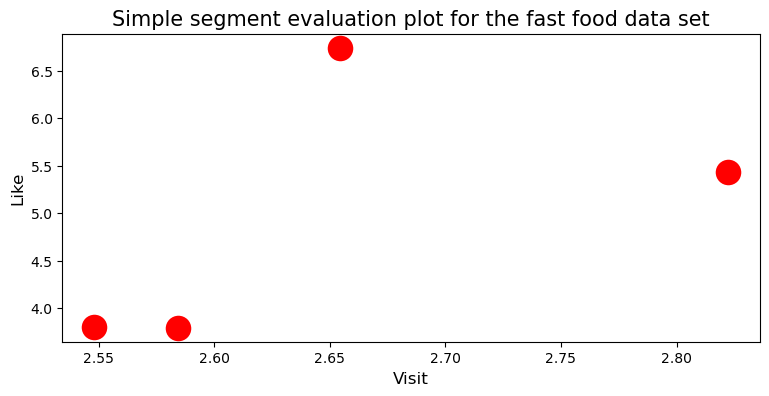

In [50]:
#Target segments

plt.figure(figsize = (9,4))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=400, color="r")
plt.title("Simple segment evaluation plot for the fast food data set",
          fontsize = 15)
plt.xlabel("Visit", fontsize = 12)
plt.ylabel("Like", fontsize = 12)
plt.show()

** Summarized report and correlations between the parameters **

In [51]:
pip install pandas-profiling

Note: you may need to restart the kernel to use updated packages.


In [52]:
from pandas_profiling import ProfileReport

C:\Users\sapta\AppData\Local\Temp\ipykernel_11400\2274191625.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [53]:
# Exploratory Data Analysis using Pandas Profiling 
profile = ProfileReport(data, title = "Mc Donalds Report")

In [54]:
# Summarizing the data based on the target variable
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]